In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

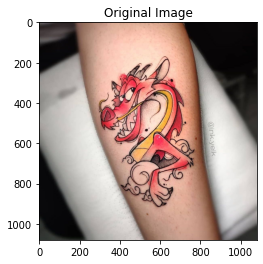

In [11]:
test_image = Image.open('figs/test.jpg')

plt.title('Original Image')
plt.imshow(test_image)

# Image Transformations
1. Crop and flip an image using Numpy array indexing
2. Implement image translation using Numpy and OpenCV
3. Implement image rotation using Numpy and OpenCV
4. Implement image resizing using OpenCV
5. Implement bitwise operations: AND, OR, XOR
6. Implement the "mask" operation, where a third image 'h' contains only a Region of Interest (ROI -- defined by the
second image mask 'g') obtained from the input image 'f'. Note that this Region can be of any shape

### 1. Crop and flip an image using Numpy array indexing

#### 1.1. Converting the image to a Numpy Array

In [12]:
image_array = np.asarray(test_image)

print(image_array)

[[[103 101 102]
  [103 101 102]
  [103 101 102]
  ...
  [  6   6   6]
  [  6   6   6]
  [  6   6   6]]

 [[101  99 100]
  [101  99 100]
  [102 100 101]
  ...
  [  6   6   6]
  [  6   6   6]
  [  6   6   6]]

 [[ 99  97  98]
  [ 99  97  98]
  [100  98  99]
  ...
  [  6   6   6]
  [  6   6   6]
  [  6   6   6]]

 ...

 [[ 49  54  50]
  [ 49  54  50]
  [ 49  54  50]
  ...
  [ 46  48  45]
  [ 46  48  45]
  [ 46  48  45]]

 [[ 49  54  50]
  [ 49  54  50]
  [ 49  54  50]
  ...
  [ 46  48  45]
  [ 46  48  45]
  [ 46  48  45]]

 [[ 49  54  50]
  [ 49  54  50]
  [ 49  54  50]
  ...
  [ 46  48  45]
  [ 46  48  45]
  [ 46  48  45]]]


#### 1.2. Cropping

In [36]:
print(f'Original image shape: {image_array.shape}')
x_crop = image_array[300:-300, :]
y_crop = image_array[:, 300:-300]

print(f'X crop image shape: {x_crop.shape}')
print(f'Y crop image shape: {y_crop.shape}')

x_crop_image = Image.fromarray(x_crop)
y_crop_image = Image.fromarray(y_crop)

Original image shape: (1080, 1080, 3)
X crop image shape: (480, 1080, 3)
Y crop image shape: (1080, 480, 3)


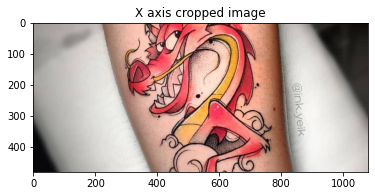

In [34]:
plt.title('X axis cropped image')
plt.imshow(x_crop_image)

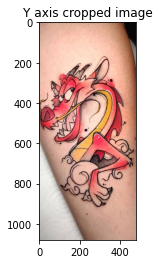

In [35]:
plt.title('Y axis cropped image')
plt.imshow(y_crop_image)

#### 1.3. Flipping

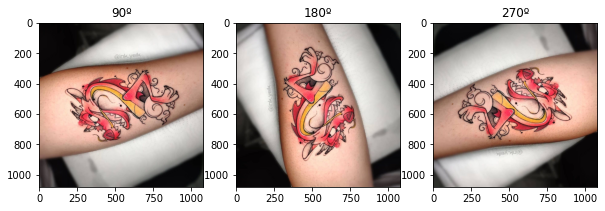

In [39]:
flip_90deg = np.rot90(image_array)
flip_180deg = np.rot90(image_array, 2)
flip_270deg = np.rot90(image_array, 3)

flip_image_90 = Image.fromarray(flip_90deg)
flip_image_180 = Image.fromarray(flip_180deg)
flip_image_270 = Image.fromarray(flip_270deg)

fig = plt.figure(figsize=(10,7))
fig.add_subplot(1, 3, 1)
plt.title('90º')
plt.imshow(flip_image_90)
fig.add_subplot(1, 3, 2)
plt.title('180º')
plt.imshow(flip_image_180)
fig.add_subplot(1, 3, 3)
plt.title('270º')
plt.imshow(flip_image_270)

### 2. Implement image translation using Numpy and OpenCV

#### 2.1. Numpy

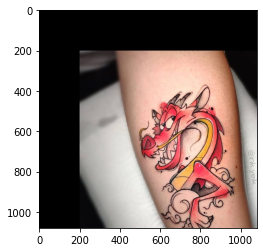

In [42]:
shift = 200
rolled = np.roll(image_array, shift, axis=[0, 1])

# Black out shifted parts
rolled = cv2.rectangle(rolled, (0, 0), (image_array.shape[0], shift), 0, -1)
rolled = cv2.rectangle(rolled, (0, 0), (shift, image_array.shape[1]), 0, -1)

rolled_image = Image.fromarray(rolled)

plt.imshow(rolled_image)

#### 2.2. OpenCV

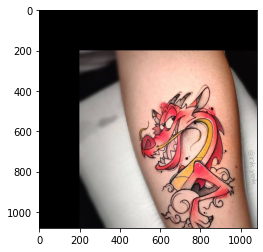

In [64]:
# Make a translation matrix
shift = 200
translation_matrix = np.array([
    [1, 0, shift],
    [0, 1, shift]
], dtype=np.float32)

shifted = cv2.warpAffine(image_array, translation_matrix, (image_array.shape[1], image_array.shape[0]))

shifted_image = Image.fromarray(shifted)

plt.imshow(shifted_image)

### 3. Implement image rotation using Numpy and OpenCV

#### 3.1. Numpy
I couldn't find a way to make this work with only Numpy

#### 3.2. OpenCV

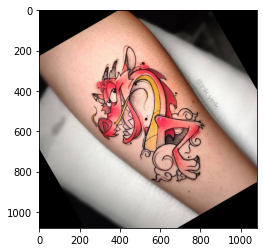

In [10]:
height, width = image_array.shape[:2]
center = (width / 2, height / 2)
angle = 30

rotate_matrix = cv2.getRotationMatrix2D(center, angle, scale=1)

rotated = cv2.warpAffine(image_array, rotate_matrix, (width, height))

rotated_image = Image.fromarray(rotated)

plt.imshow(rotated_image)

### 4. Implement image resizing using OpenCV

In [16]:
scale_percentage = 60 # 40% smaller
target_width = int(image_array.shape[1] * scale_percentage / 100)
target_height = int(image_array.shape[0] * scale_percentage / 100)

scaled_down = cv2.resize(image_array, (target_width, target_height), interpolation=cv2.INTER_AREA)

scale_percentage = 140 # 40% larger
target_width = int(image_array.shape[1] * scale_percentage / 100)
target_height = int(image_array.shape[0] * scale_percentage / 100)

scaled_up = cv2.resize(image_array, (target_width, target_height), interpolation=cv2.INTER_AREA)

print(f'Original image size:    {image_array.shape[:2]}')
print(f'Scaled down image size: {scaled_down.shape[:2]}')
print(f'Scaled up image size:   {scaled_up.shape[:2]}')

Original image size:    (1080, 1080)
Scaled down image size: (648, 648)
Scaled up image size:   (1512, 1512)


### 5. Implement bitwise operations: AND, OR, XOR

#### 5.0. Preparing the images that will be used

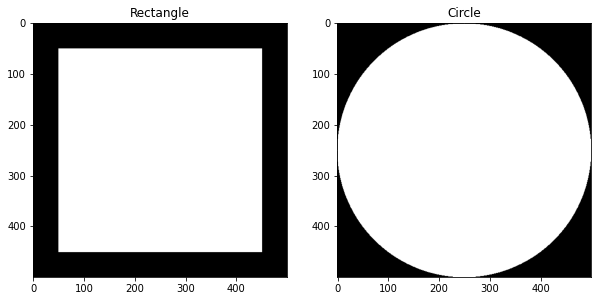

In [5]:
rectangle = np.zeros((500, 500), dtype=np.uint8)
cv2.rectangle(rectangle, (50, 50), (450, 450), 255, -1)

circle = np.zeros((500, 500), dtype=np.uint8)
cv2.circle(circle, (250, 250), 250, 255, -1)

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(1, 2, 1)
plt.title('Rectangle')
plt.imshow(Image.fromarray(rectangle), cmap='gray')
fig.add_subplot(1, 2, 2)
plt.title('Circle')
plt.imshow(Image.fromarray(circle), cmap='gray')

#### 5.1. AND

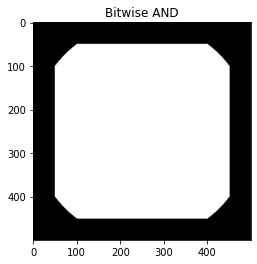

In [6]:
bitwise_and = cv2.bitwise_and(rectangle, circle)

plt.title('Bitwise AND')
plt.imshow(Image.fromarray(bitwise_and), cmap='gray')

#### 5.2. OR

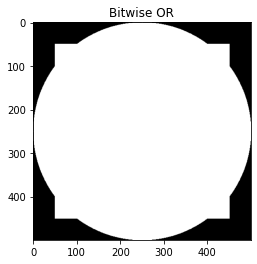

In [7]:
bitwise_or = cv2.bitwise_or(rectangle, circle)

plt.title('Bitwise OR')
plt.imshow(Image.fromarray(bitwise_or), cmap='gray')


#### 5.3. XOR

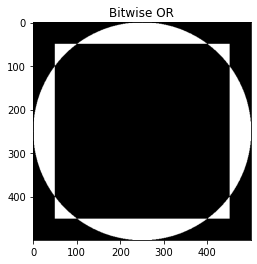

In [8]:
bitwise_xor = cv2.bitwise_xor(rectangle, circle)

plt.title('Bitwise OR')
plt.imshow(Image.fromarray(bitwise_xor), cmap='gray')

### 6. Implement the "mask" operation, where a third image 'h' contains only a Region of Interest (ROI -- defined by the second image mask 'g') obtained from the input image 'f'. Note that this Region can be of any shape

#### 6.1. Defining the input image 'f'

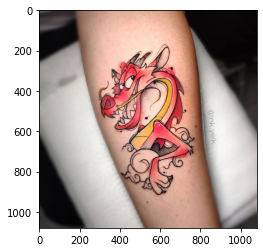

In [13]:
f = image_array

plt.imshow(Image.fromarray(f))

#### 6.2. Defining the mask 'g'

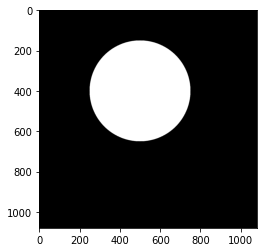

In [22]:
g = np.zeros(f.shape[:2], dtype=np.uint8)
cv2.circle(g, (500, 400), 250, 255, -1)

plt.imshow(Image.fromarray(g), cmap='gray')

#### 6.3. Applying the mask 'g' to the image 'f'

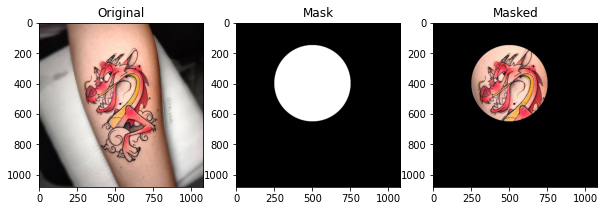

In [23]:
h = cv2.bitwise_and(f, f, mask=g)

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(1, 3, 1)
plt.title('Original')
plt.imshow(Image.fromarray(f))

fig.add_subplot(1, 3, 2)
plt.title('Mask')
plt.imshow(Image.fromarray(g), cmap='gray')

fig.add_subplot(1, 3, 3)
plt.title('Masked')
plt.imshow(Image.fromarray(h))